Instructions

Load the dataset into a data frame using Python.

Clean the data as needed.

Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure).
 Describe the obtained results.

Select the best chart to show the Average temperature per country.

Make your own questions about the dataset and try to answer them using the appropriate visuals.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
climate_df = pd.read_csv('africa_climate_change.csv')

# Data Exploration

In [4]:
climate_df.shape

(464815, 6)

In [5]:
climate_df.dtypes

DATE        object
PRCP       float64
TAVG       float64
TMAX       float64
TMIN       float64
COUNTRY     object
dtype: object

In [6]:
climate_df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [7]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


# Data Cleaning

In [8]:
#checking for missing data
#summary of the missing values in descending order
climate_df.isnull().sum().sort_values(ascending = False)

PRCP       287240
TMIN       132058
TMAX       100914
TAVG         6376
DATE            0
COUNTRY         0
dtype: int64

In [9]:
#convert columns to lower case
climate_df.columns = climate_df.columns.str.strip().str.lower()
climate_df.head()

,date,prcp,tavg,tmax,tmin,country
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


# Step 1: Handling missing data in PRCP

In [10]:
climate_df.head(20)

,date,prcp,tavg,tmax,tmin,country
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.00,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon
5,19800101 000000,NaN,52.0,61.0,45.0,Tunisia
6,19800101 000000,0.00,76.0,97.0,59.0,Senegal
7,19800101 000000,0.00,74.0,95.0,59.0,Senegal
8,19800101 000000,0.00,78.0,93.0,63.0,Senegal
9,19800101 000000,0.00,76.0,91.0,59.0,Senegal


In [11]:
prcp_mean = climate_df['prcp'].mean()

In [13]:
#Replacing the missing values in the PRCP column with the mean
climate_df['prcp'] = climate_df['prcp'].fillna(prcp_mean)

# Step 2: Handling  missing data in TMIN column

In [14]:
climate_df['tmin'].mode()

0    72.0
Name: tmin, dtype: float64

In [15]:
#Replacing the missing values in the tmincolumn with the mode
climate_df['tmin'] = climate_df['tmin'].fillna('72.0')

# Step 3: Handling  missing data in TMAX column

In [16]:
climate_df['tmax'].mode()

0    90.0
Name: tmax, dtype: float64

In [17]:
#Replacing the missing values in the TMIN column with the mode
climate_df['tmax'] = climate_df['tmax'].fillna('99.0')

# Step 4: Handling  missing data in TAVG column

In [18]:
tavg_mean = climate_df['tavg'].mean()

In [19]:
#Replacing the missing values in the PRCP column with the mean
climate_df['tavg'] = climate_df['tavg'].fillna(tavg_mean)

# Data Visualization

 ## Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon.

In [20]:
# change the data type or the date column into datetime field
climate_df['date'] = pd.to_datetime(climate_df.date)

In [22]:
#Extract the year  and put in a new column 
climate_df['year'] = climate_df.date.dt.year
climate_df.head()

,date,prcp,tavg,tmax,tmin,country,year
0,1980-01-01,0.120941,54.0,61.0,43.0,Tunisia,1980
1,1980-01-01,0.120941,49.0,55.0,41.0,Tunisia,1980
2,1980-01-01,0.000000,72.0,86.0,59.0,Cameroon,1980
3,1980-01-01,0.120941,50.0,55.0,43.0,Tunisia,1980
4,1980-01-01,0.120941,75.0,91.0,72.0,Cameroon,1980


In [24]:
#Get the annual average temperatures in Cameroon and Tunisia
annual_avg_tuncam = climate_df[(climate_df.country == 'Tunisia') | (climate_df.country == 'Cameroon')].groupby(['year', 'country'])['tavg'].mean().reset_index()
annual_avg_tuncam.head()

,year,country,tavg
0,1980,Cameroon,78.263660
1,1980,Tunisia,64.865427
2,1981,Cameroon,78.163377
3,1981,Tunisia,65.981908
4,1982,Cameroon,77.375319


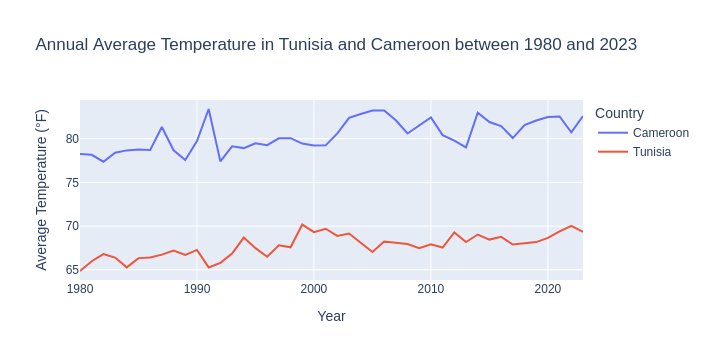

In [26]:
# Create a line chart
fig = px.line(annual_avg_tuncam, 
              x='year', 
              y='tavg', 
              color='country', 
              title='Annual Average Temperature in Tunisia and Cameroon between 1980 and 2023',
              labels={'tavg': 'Average Temperature (°F)', 'year': 'Year'})

fig.update_layout(xaxis_title='Year', yaxis_title='Average Temperature (°F)', legend_title_text='Country')

# Show the chart
fig.show()

### Interpretation of the Annual Average Temperature in Tunisia and Cameroon between 1980 and 2023

1. Cameroon annual average temperatures have been higher than Tunisia between 1980 and 2003
2. For both countries there has been an upward trend in temmperatures indication global warming

## Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

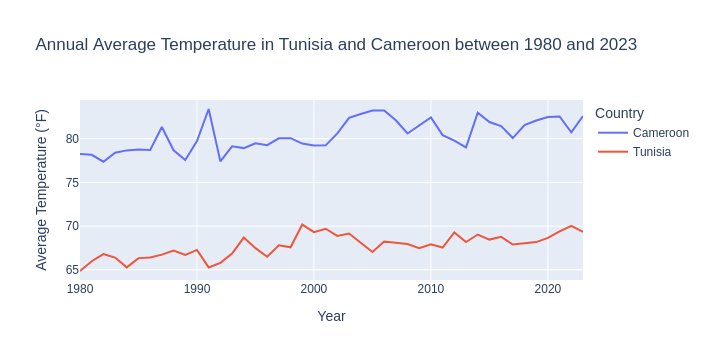

In [28]:
# Create a line chart
fig = px.line(annual_avg_tuncam, 
              x='year', 
              y='tavg', 
              color='country', 
              title='Annual Average Temperature in Tunisia and Cameroon between 1980 and 2023',
              labels={'tavg': 'Average Temperature (°F)', 'year': 'Year'})

fig.update_layout(xaxis_title='Year', yaxis_title='Average Temperature (°F)', legend_title_text='Country')

# Show the chart
fig.show()

## Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

In [30]:

# Filter data for Senegal
senegal_df = climate_df[climate_df['country'] == 'Senegal']

# Filter data for the periods [1980, 2000] and [2000, 2023]
data_1980_2000 = senegal_df[(senegal_df['year'] >= 1980) & (senegal_df['year'] <= 2000)]
data_2000_2023 = senegal_df[(senegal_df['year'] > 2000) & (senegal_df['year'] <= 2023)]

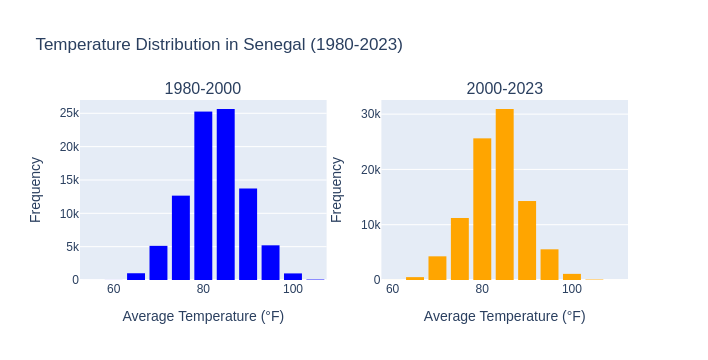

In [31]:
# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=['1980-2000', '2000-2023'])

# Add histogram for 1980-2000
fig.add_trace(
    go.Histogram(x=data_1980_2000['tavg'], name='1980-2000', marker_color='blue', nbinsx=20),
    row=1, col=1
)

# Add histogram for 2000-2023
fig.add_trace(
    go.Histogram(x=data_2000_2023['tavg'], name='2000-2023', marker_color='orange', nbinsx=20),
    row=1, col=2
)

# Update layout
fig.update_layout(title_text='Temperature Distribution in Senegal (1980-2023)',
                  xaxis_title_text='Average Temperature (°F)',
                  yaxis_title_text='Frequency',
                  bargap=0.2, # Gap between bars of adjacent location coordinates
                  showlegend=False)

# Customize the x and y axes for both histograms
fig.update_xaxes(title_text='Average Temperature (°F)', row=1, col=1)
fig.update_xaxes(title_text='Average Temperature (°F)', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)

# Show the figure
fig.show()


### Interpretations

Between 1980 and 2000 there is a shift in the distribution between the two periods, such as more frequent higher temperatures in the first period compared to 2000 and 2003.